# 序列预测

---

In [1]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.nn import init

## 已知
1949年到1960年每一个月的飞机客流量

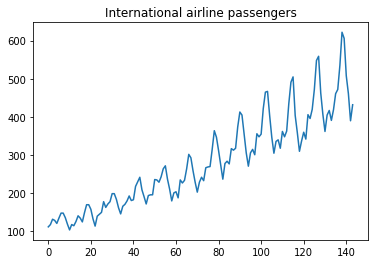

In [2]:
# 获取输入数据，并可视化

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

data = pd.read_csv('data.csv', usecols=[1])
plt.title('International airline passengers')
plt.plot(data)
plt.show()

---
## 目标
给定前三个月的客流量预测当前月的飞机客流量。

以1949年到1958年的数据作为训练集， 1959和1960年的数据用作测试集。
## 方法
1. 模型使用某三个月的数据作为输入，获得第四个月的客流量
2. 以此类推进行测试

## 比较
创建三个模型进行结果比较 : `FC`, `RNN`, `LSTM`, `GRU1`, `GRU2`

`GRU2`比`GRU1`多一般的状态数

分别从预测准确性，训练时间两方面分析。

---
**以下部分为数据预处理的代码，会在其他几个模型中动态生成\*.py文件并引用**

In [3]:
# 定义numpy转化为Tensor的函数
toTs = lambda x : torch.from_numpy(x)

# 定义检测cuda的函数
cudAvl = lambda x : x.cuda() if torch.cuda.is_available() else x

In [4]:
# 数据预处理
data = data.dropna()
dataSet = data.values
dataSet = dataSet.astype('float32')
print('dataSet shape :\t', dataSet.shape)

# 数据归一化
def MinMaxScaler(X) :
    mx, mi = np.max(X), np.min(X)
    X_std = (X - mi) / (mx - mi)
    return X_std

dataSet = MinMaxScaler(dataSet)

# 将数据分为训练集和测试集
train = dataSet[:12*10]
real = dataSet
print('train data shape :', train.shape)
print('real data shape :', real.shape)

dataSet shape :	 (144, 1)
train data shape : (120, 1)
real data shape : (144, 1)


In [5]:
input_size = 3